## Network of thrones

Taken from: https://www.macalester.edu/~abeverid/thrones.html

In [1]:
%matplotlib inline

from operator import itemgetter
import networkx as nx

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os
from io import StringIO
from IPython.display import SVG, display

In [2]:
df = pd.read_csv("../../data/stormofswords.csv")

In [3]:
df.head()

,Source,Target,Weight
0,Aemon,Grenn,5
1,Aemon,Samwell,31
2,Aerys,Jaime,18
3,Aerys,Robert,6
4,Aerys,Tyrion,5


In [4]:
G = nx.from_pandas_edgelist(df, "Source", "Target", edge_attr="Weight")

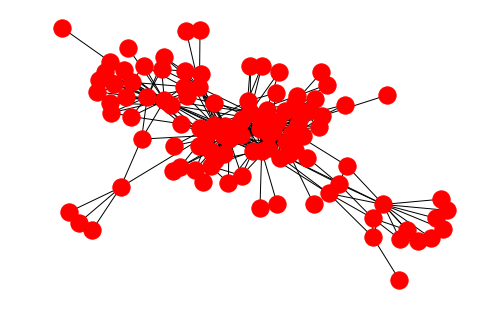

In [5]:
nx.draw(G)

(array([25.,  4.,  1.,  1.,  2.,  1.,  1.,  0.,  1.,  1.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <a list of 10 Patch objects>)

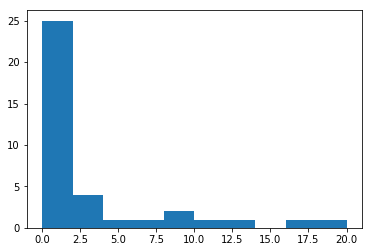

In [6]:
plt.hist(nx.degree_histogram(G))

In [7]:
from utilities import get_all_node_metrics

In [8]:
df_metrics = get_all_node_metrics(G)

In [9]:
df_metrics.sort_values("degree", ascending=False)

,degree,betweenness,closeness,eigenvector,clustering
Tyrion,0.339623,0.197913,0.512077,0.336638,0.180952
Jon,0.245283,0.229965,0.479638,0.142455,0.156923
Sansa,0.245283,0.126720,0.509615,0.278782,0.252308
Robb,0.235849,0.126964,0.488479,0.244845,0.240000
Jaime,0.226415,0.099943,0.479638,0.273663,0.278986
Tywin,0.207547,0.065538,0.469027,0.224856,0.229437
Cersei,0.188679,0.026746,0.443515,0.246449,0.357895
Arya,0.179245,0.079607,0.486239,0.222931,0.333333
Catelyn,0.169811,0.048906,0.441667,0.192485,0.294118
Robert,0.169811,0.209452,0.500000,0.199588,0.287582


In [10]:
from utilities import plot_network

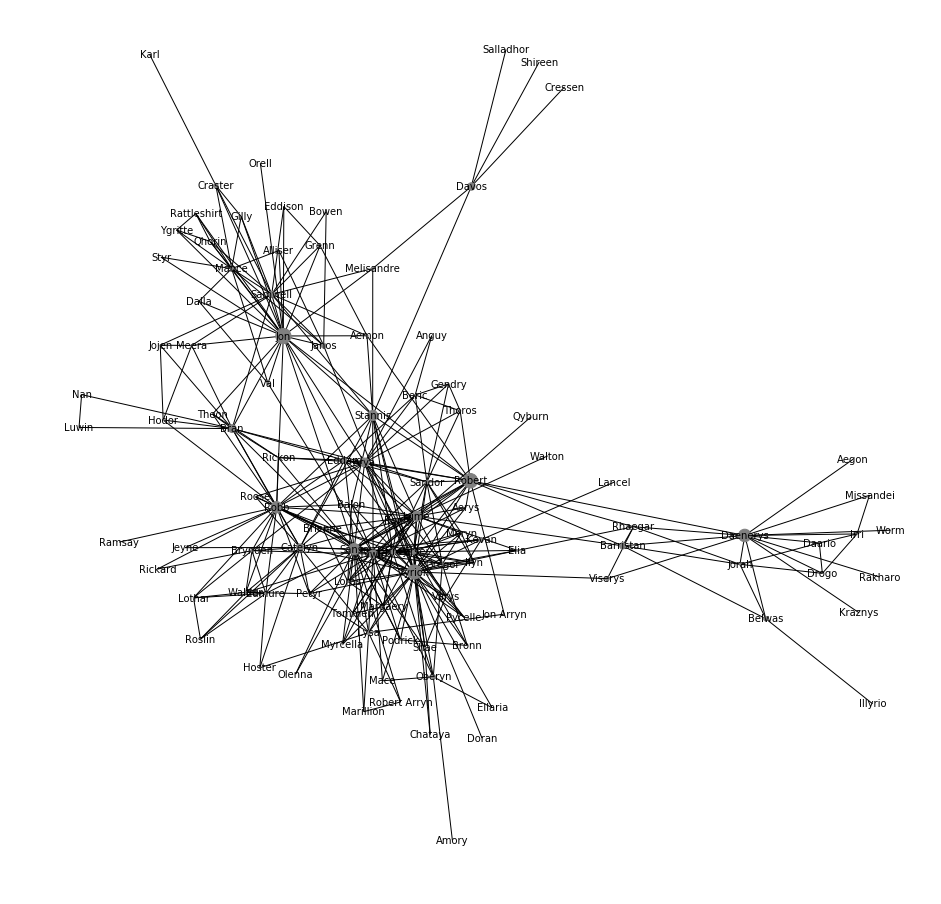

In [15]:
fig, ax = plt.subplots(figsize=(16, 16))
plot_network(G, nx.betweenness_centrality(G), factor=1000, font_size=10, node_color="0.5")